# Source-Code:

In [10]:
import pandas as pd
import requests
from io import StringIO

url = "https://github.com/Shaik-Mohammed-Kaif/Candidate-Elimination-Algo/raw/refs/heads/main/Sample_dataset.csv"

# Retrieve the dataset
response = requests.get(url)

# Convert response text into Pandas DataFrame
df = pd.read_csv(StringIO(response.text))

# Print first few rows
print(df.head())

      sky Airtemp Humidity    Wind Water Forecast WaterSport
0  Cloudy    Cold     High  Strong  Warm   Change        Yes
1   Sunny    Warm   Normal  Strong  Warm     Same        Yes
2   Sunny    Warm     High  Strong  Warm     Same        Yes
3  Cloudy    Cold     High  Strong  Warm   Change         No
4   Sunny    Warm     High  Strong  Cool   Change        Yes


$$
(OR)
$$

In [11]:
## Online Dataset Reteriving..

# Retrieve for Related Dataset in System..
import pandas as pd
import requests
import os
from io import StringIO  # Required library importing...

url = "Sample.csv"

df = pd.read_csv(url)
print(df)

        sky Airtemp Humidity    Wind Water Forecast WaterSport
0    Cloudy    Cold     High  Strong  Warm   Change        Yes
1     Sunny    Warm   Normal  Strong  Warm     Same        Yes
2     Sunny    Warm     High  Strong  Warm     Same        Yes
3    Cloudy    Cold     High  Strong  Warm   Change         No
4     Sunny    Warm     High  Strong  Cool   Change        Yes
5      Rain    Mild     High    Weak  Cool   Change         No
6      Rain    Cool   Normal    Weak  Cool     Same         No
7  Overcast    Cool   Normal  Strong  Warm     Same        Yes


In [14]:
df

,sky,Airtemp,Humidity,Wind,Water,Forecast,WaterSport
0,Cloudy,Cold,High,Strong,Warm,Change,Yes
1,Sunny,Warm,Normal,Strong,Warm,Same,Yes
2,Sunny,Warm,High,Strong,Warm,Same,Yes
3,Cloudy,Cold,High,Strong,Warm,Change,No
4,Sunny,Warm,High,Strong,Cool,Change,Yes
5,Rain,Mild,High,Weak,Cool,Change,No
6,Rain,Cool,Normal,Weak,Cool,Same,No
7,Overcast,Cool,Normal,Strong,Warm,Same,Yes


In [15]:
df.columns

Index(['sky', 'Airtemp', 'Humidity', 'Wind', 'Water', 'Forecast',
       'WaterSport'],
      dtype='object')

In [16]:
df.shape

(8, 7)

In [17]:
df.size

56

In [18]:
df.describe()

,sky,Airtemp,Humidity,Wind,Water,Forecast,WaterSport
count,8,8,8,8,8,8,8
unique,4,4,2,2,2,2,2
top,Sunny,Warm,High,Strong,Warm,Change,Yes
freq,3,3,5,6,5,4,5


In [12]:
import numpy as np
import pandas as pd

# Load dataset
data = df

# Extract concepts and target
concepts = np.array(data.iloc[:, :-1])
target = np.array(data.iloc[:, -1])

# Candidate Elimination Algorithm (Optimized)
def candidate_elimination(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]

    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            specific_h = ["?" if specific_h[x] != h[x] else specific_h[x] for x in range(len(specific_h))]
        else:
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]

    general_h = [h for h in general_h if h != ['?' for _ in range(len(specific_h))]]

    return specific_h, general_h

s_final, g_final = candidate_elimination(concepts, target)
print("Final Specific Hypothesis:", s_final)
print("Final General Hypothesis:", g_final)

Final Specific Hypothesis: ['?', '?', '?', 'Strong', '?', '?']
Final General Hypothesis: [['?', '?', '?', 'Strong', '?', '?']]


In [13]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.DataFrame(data=pd.read_csv('sample.csv'))
concepts = np.array(data.iloc[:, 0:-1])  # All columns except the target
target = np.array(data.iloc[:, -1])  # Target column

# Candidate Elimination Algorithm
def learn(concepts, target):
    # Initialize the specific hypothesis (specific_h) as the first positive example
    specific_h = concepts[0].copy()
    print("Initialization of Specific Hypothesis (specific_h) and General Hypothesis (general_h):")
    print("Specific Hypothesis:", specific_h)
    
    # Initialize the general hypothesis (general_h) as the most general hypotheses
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("General Hypothesis:")
    print(general_h)
    
    # Iterate through each concept and update hypotheses
    for i, h in enumerate(concepts):
        if target[i] == "Yes":  # Positive example
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:  # If there's a mismatch, generalize specific_h
                    specific_h[x] = '?'
                    general_h[x][x] = '?'  # Update general_h accordingly
        elif target[i] == "No":  # Negative example
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:  # If there's a mismatch, specialize general_h
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'  # No need to specialize if it's consistent
        
        print(f"\nStep {i + 1} of Candidate Elimination Algorithm:")
        print("Specific Hypothesis (specific_h):", specific_h)
        print("General Hypothesis (general_h):", general_h)
    
    # Remove overly general hypotheses
    general_h = [h for h in general_h if h != ['?' for _ in range(len(specific_h))]]
    
    return specific_h, general_h

# Run the algorithm and get the final hypotheses
s_final, g_final = learn(concepts, target)

# Display final results
print("\nFinal Specific Hypothesis (specific_h):")
print(s_final)
print("\nFinal General Hypothesis (general_h):")
print(g_final)

Initialization of Specific Hypothesis (specific_h) and General Hypothesis (general_h):
Specific Hypothesis: ['Cloudy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
General Hypothesis:
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 1 of Candidate Elimination Algorithm:
Specific Hypothesis (specific_h): ['Cloudy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
General Hypothesis (general_h): [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm:
Specific Hypothesis (specific_h): ['?' '?' '?' 'Strong' 'Warm' '?']
General Hypothesis (general_h): [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?

$$
Visualization's
$$

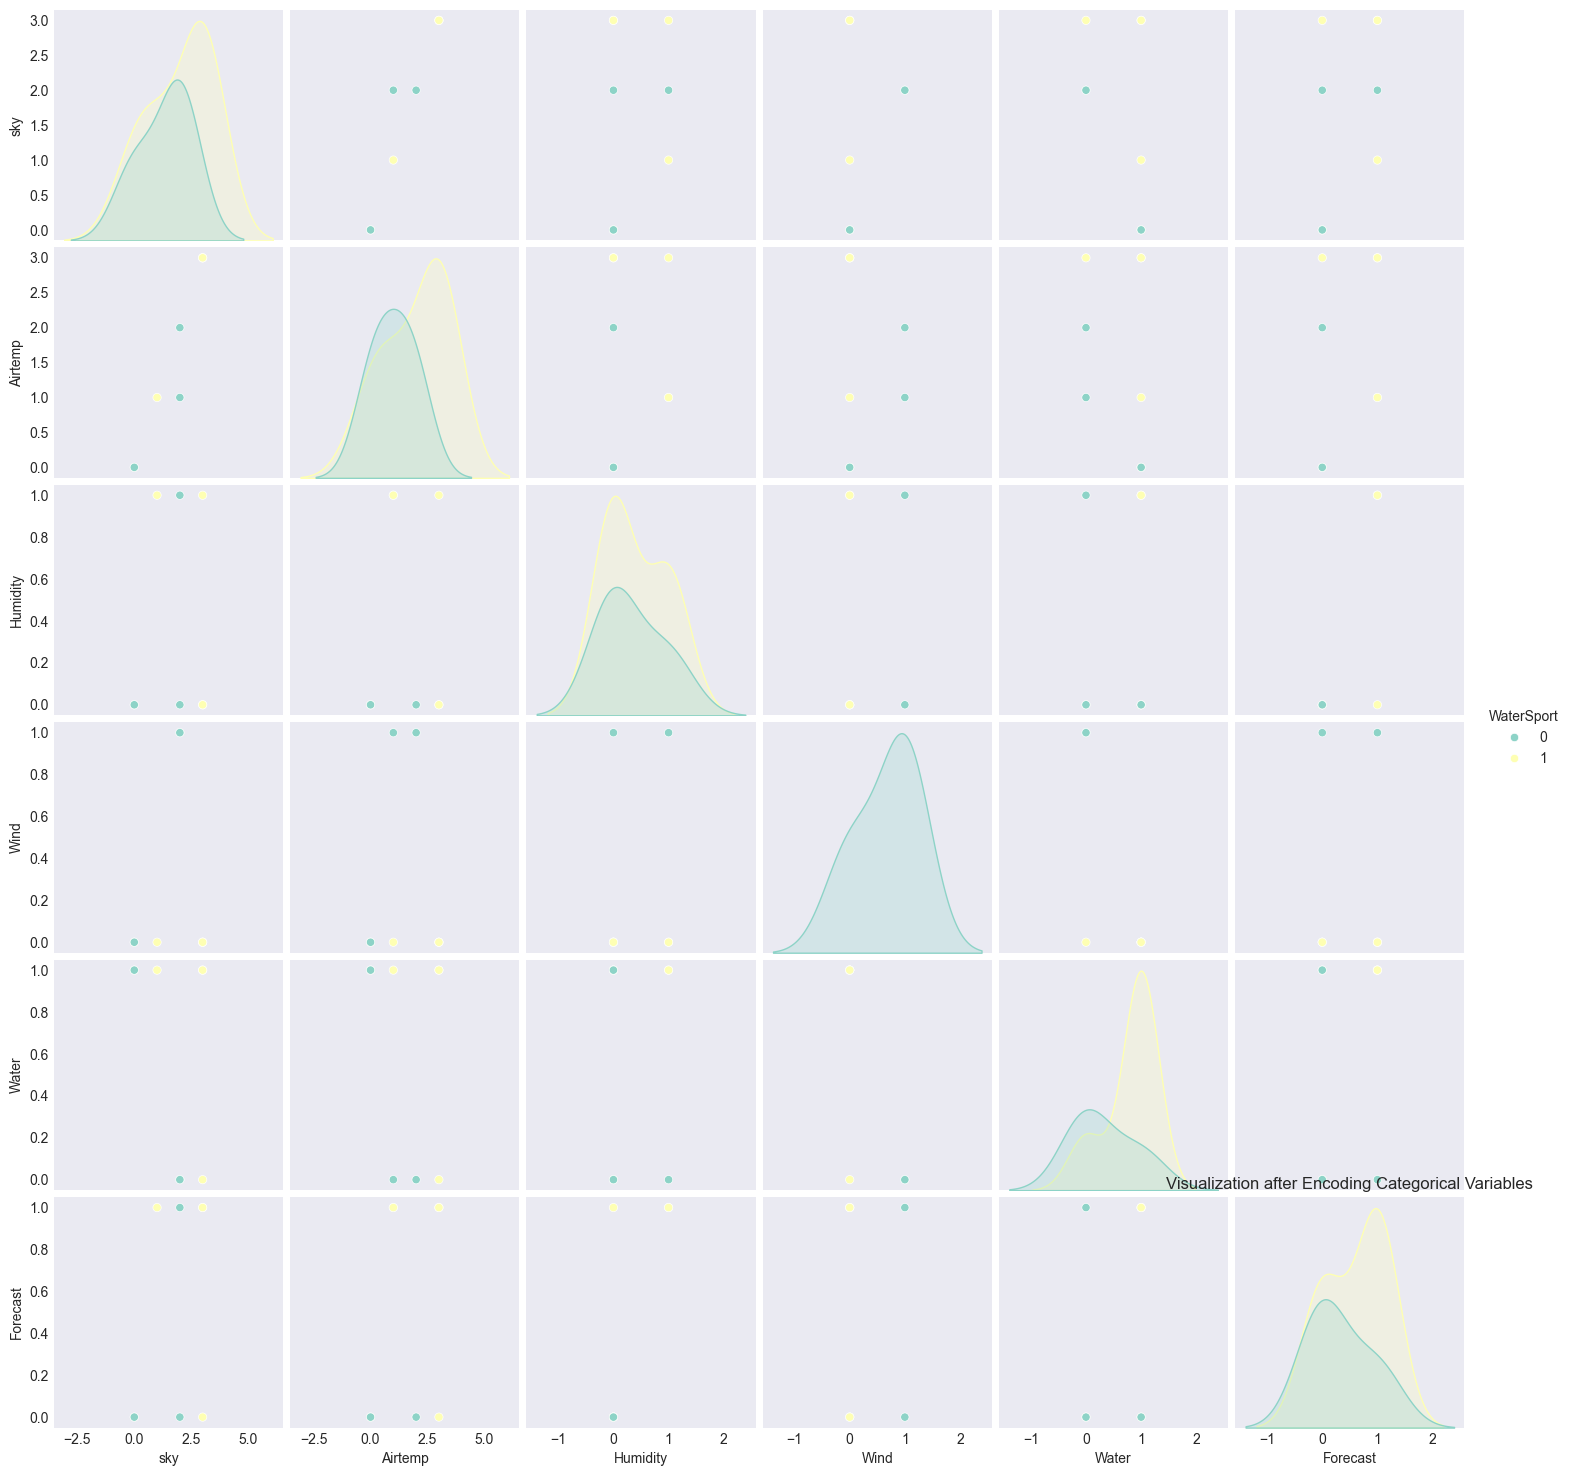

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.apply(LabelEncoder().fit_transform)

style.use("seaborn-v0_8-dark")

# Run pairplot on encoded data
sns.pairplot(df_encoded, hue="WaterSport")
plt.title("Visualization after Encoding Categorical Variables")
plt.show()

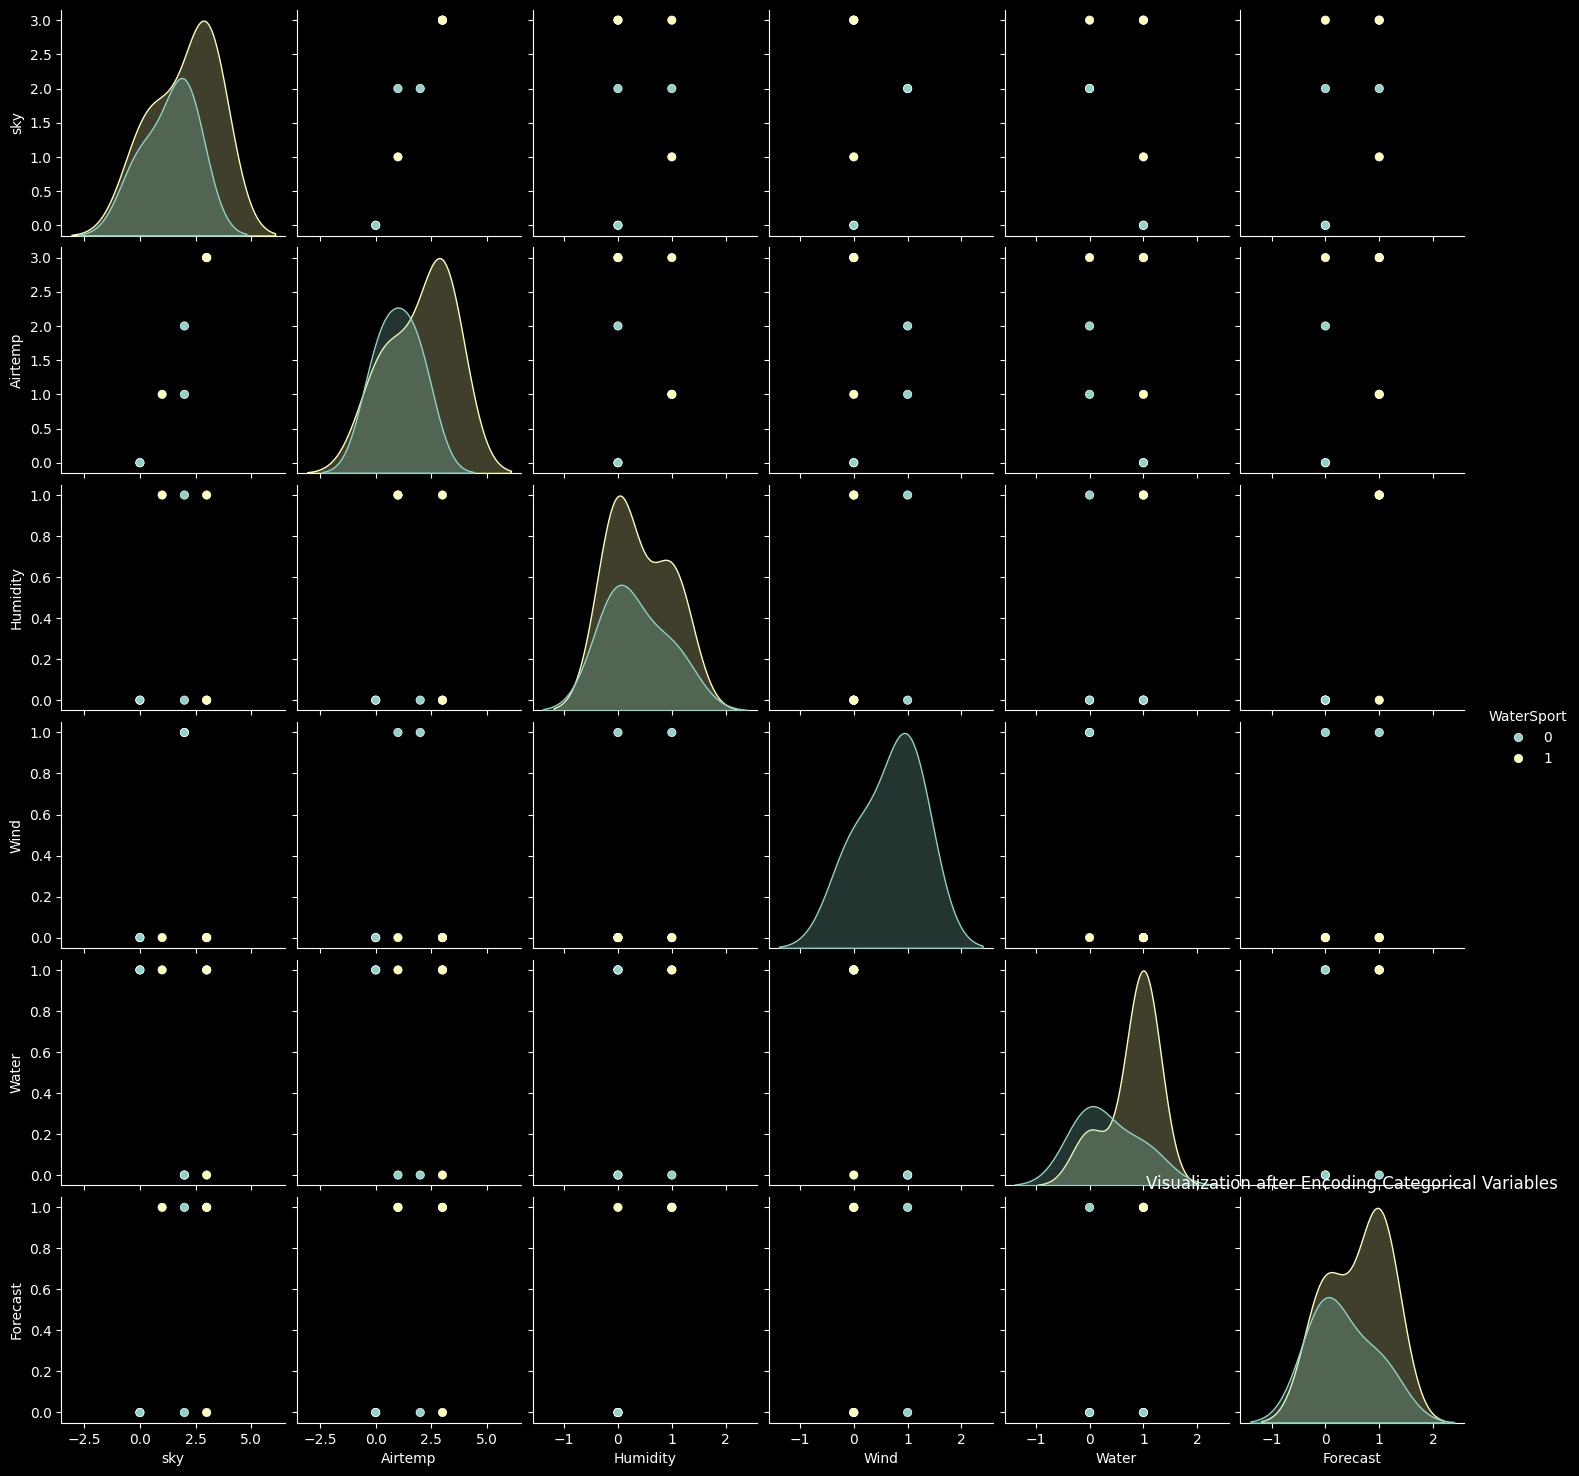

In [25]:
style.use("dark_background")

# Run pairplot on encoded data
sns.pairplot(df_encoded, hue="WaterSport")
plt.title("Visualization after Encoding Categorical Variables")
plt.show()

In [29]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# The End